In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load & parse
df = pd.read_csv('propertydataset.csv')
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')  # parse dates

In [3]:
# 2. Basic info & missing values
print(df.info())
#print(df.describe(include='all'))
print("--------------------------------")
print('Missing values per column:\n', df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Serial Number     9999 non-null   int64         
 1   List Year         9999 non-null   int64         
 2   Date Recorded     5948 non-null   datetime64[ns]
 3   Town              9999 non-null   object        
 4   Address           9999 non-null   object        
 5   Assessed Value    9999 non-null   int64         
 6   Sale Amount       9999 non-null   float64       
 7   Sales Ratio       9999 non-null   float64       
 8   Property Type     9902 non-null   object        
 9   Residential Type  8735 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 781.3+ KB
None
--------------------------------
Missing values per column:
 Serial Number          0
List Year              0
Date Recorded       4051
Town                 

In [4]:
# 3. Univariate statistics on sale price
prices = df['Sale Amount'].dropna()
print(f"Mean Sale Price: {prices.mean():.0f}")
print(f"Std Dev Sale Price: {prices.std():.0f}")
print("25/50/75th percentiles:", np.percentile(prices, [25, 50, 75]))

Mean Sale Price: 579546
Std Dev Sale Price: 2151579
25/50/75th percentiles: [210000. 318500. 490000.]


In [5]:
# 4. Correlation among numeric fields
num = df[['Assessed Value', 'Sale Amount', 'Sales Ratio']].dropna()
print("Correlation matrix:\n", num.corr())

Correlation matrix:
                 Assessed Value  Sale Amount  Sales Ratio
Assessed Value        1.000000     0.358889     0.465711
Sale Amount           0.358889     1.000000    -0.014750
Sales Ratio           0.465711    -0.014750     1.000000


In [6]:
# 5. Year‐based analysis
#   a) Avg sale price by listing year
print("Avg Sale Price by List Year:\n", df.groupby('List Year')['Sale Amount'].mean())
print("--------------------------------")
#   b) Most & least expensive sales
print("Max Sale Record:\n", df.loc[df['Sale Amount'].idxmax()])
print("--------------------------------")
print("Min Sale Record:\n", df.loc[df['Sale Amount'].idxmin()])


Avg Sale Price by List Year:
 List Year
2001    172226.957746
2002    199496.153846
2020    483688.665116
2021    763367.796610
2022    584590.115096
Name: Sale Amount, dtype: float64
--------------------------------
Max Sale Record:
 Serial Number                               220810
List Year                                     2022
Date Recorded                                  NaT
Town                                     Greenwich
Address             INDIAN FIELD ROAD 0499 & 0 & I
Assessed Value                            30927330
Sale Amount                            138830000.0
Sales Ratio                                 0.2227
Property Type                          Residential
Residential Type                     Single Family
Name: 4699, dtype: object
--------------------------------
Min Sale Record:
 Serial Number              10045
List Year                   2001
Date Recorded                NaT
Town                     Bethany
Address             9 SIMPSON CT
Assessed Valu

In [7]:
# 6. New feature: price vs. assessed value
df['Price_per_Assessed'] = df['Sale Amount'] / df['Assessed Value']
print(df[['Town','Sale Amount','Assessed Value','Price_per_Assessed']].head())

      Town  Sale Amount  Assessed Value  Price_per_Assessed
0  Andover     232000.0          139020            1.668825
1  Ansonia     325000.0          150500            2.159468
2  Ashford     430000.0          253000            1.699605
3     Avon     805000.0          329730            2.441391
4     Avon     179900.0          130400            1.379601


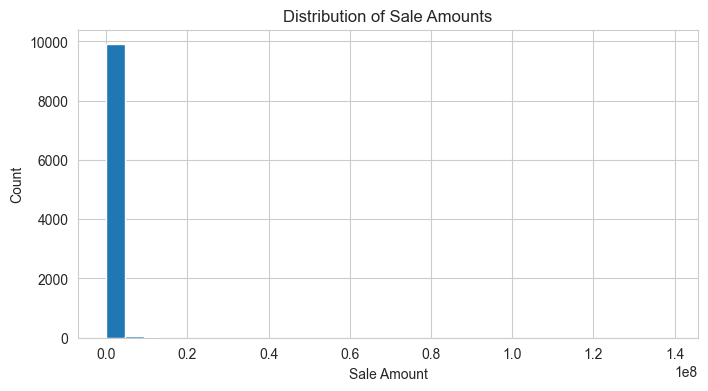

In [8]:
# 7. Visualizations
sns.set_style('whitegrid')

# 7a. Histogram of sale prices
plt.figure(figsize=(8,4))
plt.hist(prices, bins=30)
plt.title('Distribution of Sale Amounts')
plt.xlabel('Sale Amount')
plt.ylabel('Count')
plt.show()

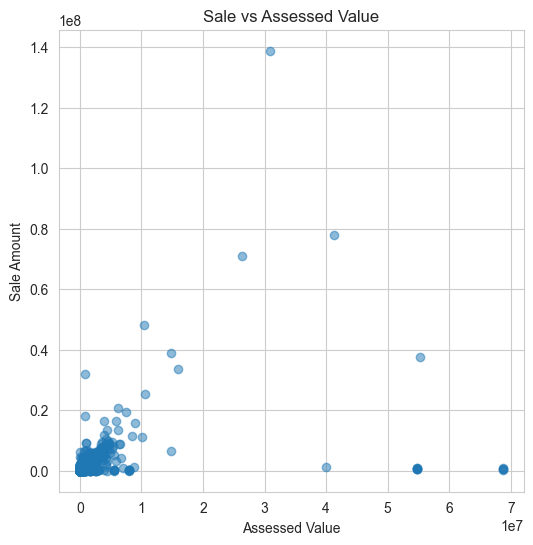

In [9]:
# 7b. Scatter: Sale Amount vs. Assessed Value
plt.figure(figsize=(6,6))
plt.scatter(df['Assessed Value'], df['Sale Amount'], alpha=0.5)
plt.title('Sale vs Assessed Value')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.show()

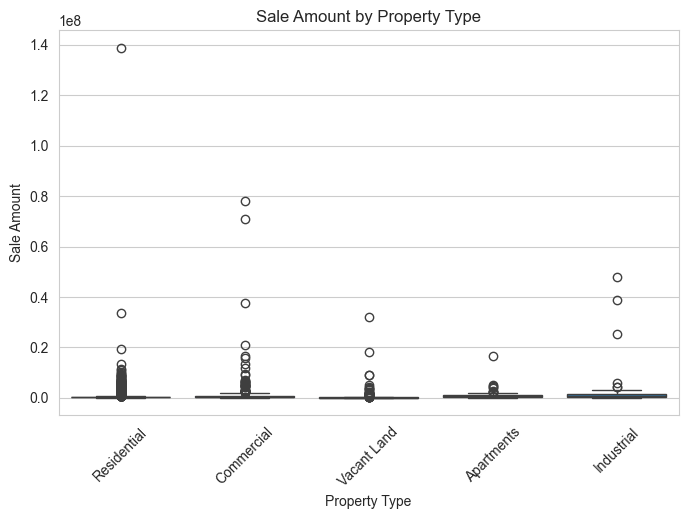

In [10]:
# 7c. Boxplot of Sale Amount by Property Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Property Type', y='Sale Amount', data=df[df['Property Type'].notna()])
plt.xticks(rotation=45)
plt.title('Sale Amount by Property Type')
plt.show()

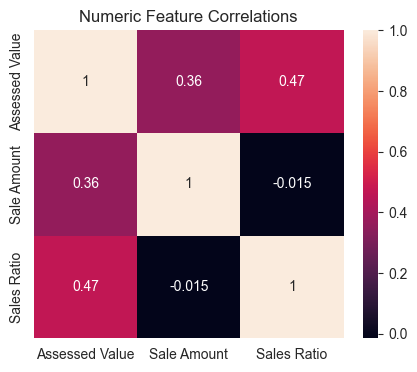

In [11]:
# 7d. Heatmap of correlations
plt.figure(figsize=(5,4))
sns.heatmap(num.corr(), annot=True)
plt.title('Numeric Feature Correlations')
plt.show()

In [12]:
# 8. Next steps suggestions:
#    • Drop or impute missing Town/Residential Type
#    • Convert 'List Year' and 'Date Recorded' into age features
#    • Identify outliers (IQR or z‐score) in price and ratio
#    • Build a regression model (e.g., RandomForest) to predict Sale Amount
